# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Sampling a continous curve with a spline



# Import modules
<hr style="border:2px solid black"> </hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from numpy.random import seed
from sklearn.model_selection import train_test_split
from scipy.interpolate import UnivariateSpline
rcParams['figure.figsize'] = 16, 5
rcParams['font.size'] = 20

# Create a test function
<hr style="border:2px solid black"> </hr>


- To make the problem interesting, we generate observations of the target y as the sum of a deterministic term computed by the function f and a random noise term that follows a centered log-normal. 
- To make this even more interesting we consider the case where the amplitude of the noise depends on the input variable x (**heteroscedastic** noise).
- The lognormal distribution is non-symmetric and long tailed: observing large outliers is likely but it is impossible to observe small outliers.    



In [7]:
def f(x):
    """The function to predict."""
    return 2*x + x * np.sin(x)

x = np.linspace(0, 10, 50)

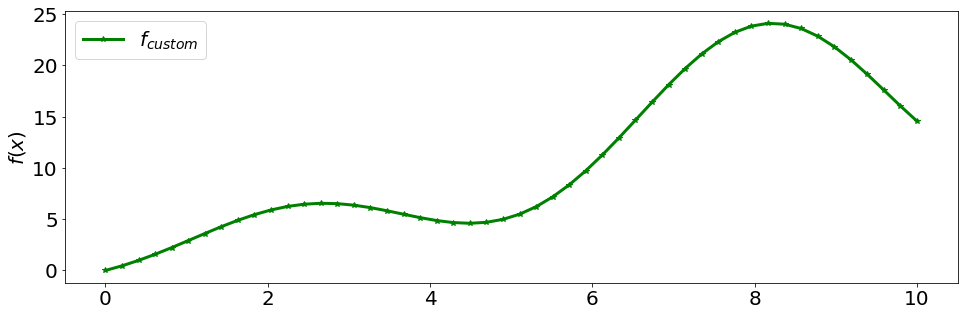

In [9]:
fig = plt.figure()
plt.plot(x, f(x), 'g*-', lw =3, label = r'$f_{custom}$')
plt.ylabel('$f(x)$')
plt.legend(loc='upper left')
plt.show()

# Interpolation
<hr style="border:2px solid black"> </hr>


- k = curve degree
- ext = whether to interpolate the end points?
- s = smoothing factor



In [10]:
inter = UnivariateSpline(x, f(x), k = 3, ext = 0, s = 0)   

# Upsampling or downsampling
<hr style="border:2px solid black"> </hr>

In [11]:
xFine = np.linspace(0, 10, 150)
xCoarse = np.linspace(0, 10, 20)

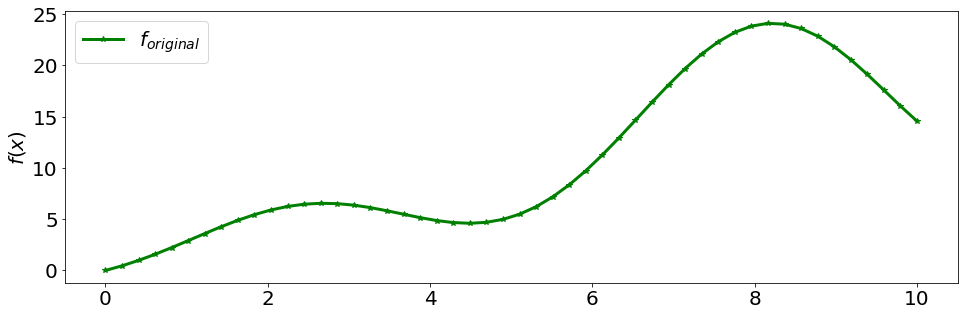

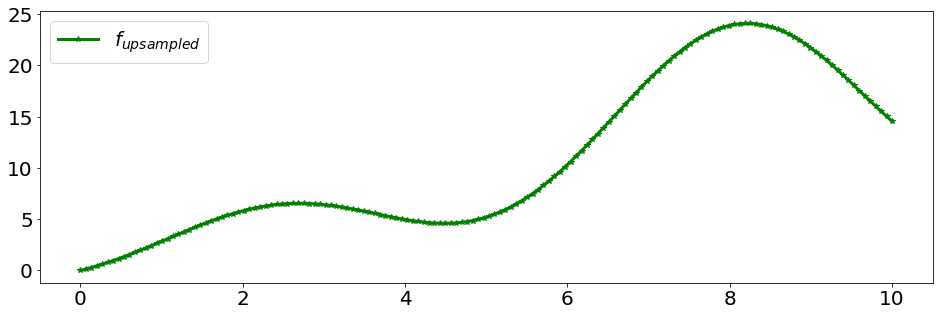

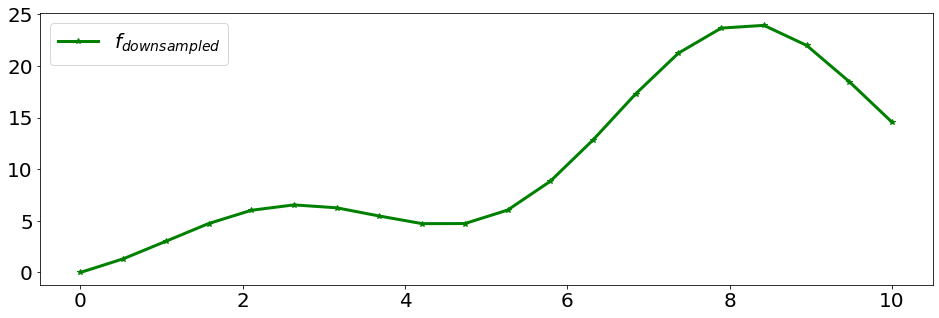

In [13]:
fig = plt.figure()
plt.plot(x, f(x), 'g*-', lw =3, label = r'$f_{original}$')
plt.ylabel('$f(x)$')
plt.legend(loc='upper left')
plt.show()

fig = plt.figure()
plt.plot(xFine, inter(xFine), 'g*-', lw =3, label = r'$f_{upsampled}$')
plt.legend(loc='upper left')
plt.show()

fig = plt.figure()
plt.plot(xCoarse, inter(xCoarse), 'g*-', lw =3, label = r'$f_{downsampled}$')
plt.legend(loc='upper left')
plt.show()